In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [59]:
# set the figure size
pylab.rcParams['figure.figsize'] = (22, 18)
sns.set(font_scale=2)

$V_B(dC_B/dt) = H_{HV}(C_L - C_B) + Q_{IV}$

$V_L(dC_L/dt) = F_{HV}(C_L - C_B) + Q_{GI} - V_{max} C_L / (K_{m} + C_{L})$

In [60]:
# constants

Vb = 48
Vl = 0.61
Qiv = 8.35
Qgi = 0
Fhv = 1.5
Km = 0.1
Vmax = 2.75

In [61]:
# Euler method

Cb = [0]
Cl = [0]

h = 0.0001
for t in np.arange(0, 480, h):
    if t > 120:
        Qiv = 0
    Cb.append(Cb[-1] + h * ((Fhv*(Cl[-1]-Cb[-1]) + Qiv) / Vb))
    Cl.append(Cl[-1] + h * ((Fhv*(Cb[-1]-Cl[-1]) + Qgi - (Vmax * Cl[-1]) / (Km + Cl[-1])) / Vl))

In [62]:
df = pd.read_csv("alc1.csv", sep=";")

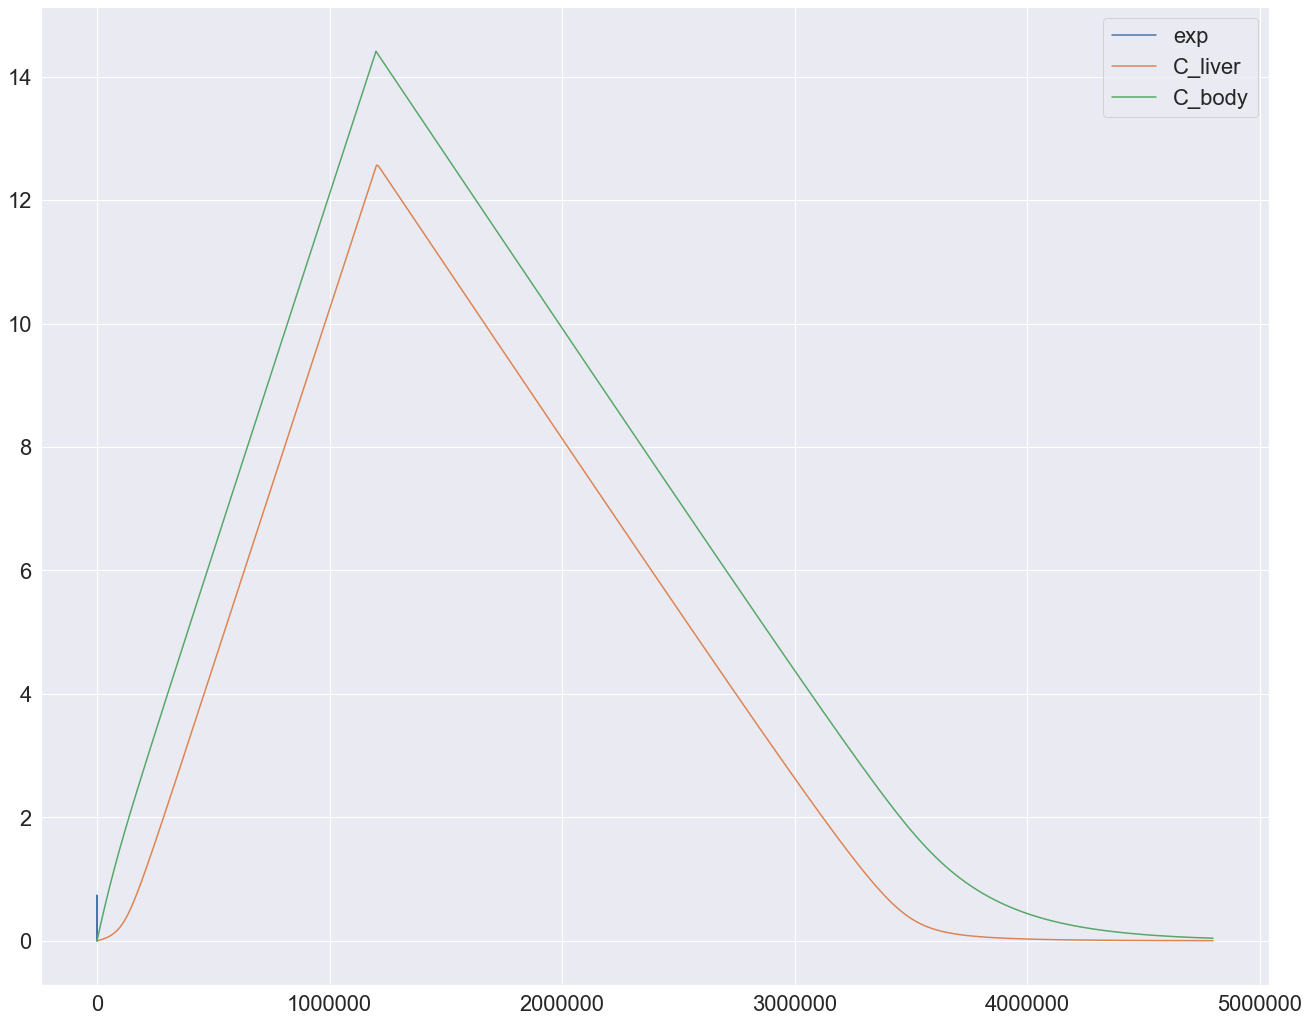

In [63]:
plt.plot(df["Mean (mg/ml)"], label="exp")
plt.plot(Cl, label="C_liver")
plt.plot(Cb, label="C_body")
plt.legend()